In [1]:
import numpy as np
import pandas as pd
from scipy import stats
rng = np.random.default_rng()

# 2 sample independent test for the mean
Is the mean of the two samples statistically different?

Identical mean 

<AxesSubplot:ylabel='Frequency'>

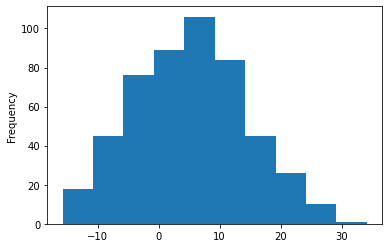

In [7]:
pd.Series(stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)).plot.hist()

In [38]:
# loc = mean, scale = standard deviation, size = number of samples
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)

print(stats.ttest_ind(rvs1, rvs2))

# equal_var = False means that the two samples have unequal variances. We perform a Welch's t-test
# that does not assume equal population variance.
print(stats.ttest_ind(rvs1, rvs2, equal_var=False))

Ttest_indResult(statistic=1.0765755546982698, pvalue=0.2819301011876895)
Ttest_indResult(statistic=1.0765755546982698, pvalue=0.28193051837736155)


Different variance. Leads to lower p-values which is bad. 

In [39]:
rvs3 = stats.norm.rvs(loc=5, scale=20, size=500, random_state=rng)
print(stats.ttest_ind(rvs1, rvs3))
print(stats.ttest_ind(rvs1, rvs3, equal_var=False))

Ttest_indResult(statistic=0.8752316290902312, pvalue=0.38165847341951964)
Ttest_indResult(statistic=0.8752316290902312, pvalue=0.38174612273553477)


Different mean

In [43]:
rvs4 = stats.norm.rvs(loc=10, scale=10, size=500, random_state=rng)
print(stats.ttest_ind(rvs1, rvs4))
print(stats.ttest_ind(rvs1, rvs4, equal_var=False))

Ttest_indResult(statistic=-8.276417160593105, pvalue=4.0378406925888725e-16)
Ttest_indResult(statistic=-8.276417160593105, pvalue=4.0452988665356315e-16)


Different sizes of samples. welsh is different

In [47]:
rvs5 = stats.norm.rvs(loc=5, scale=20, size=100, random_state=rng)
print(stats.ttest_ind(rvs1, rvs5))
print(stats.ttest_ind(rvs1, rvs5, equal_var=False))

Ttest_indResult(statistic=-1.084152669828774, pvalue=0.2787340145626578)
Ttest_indResult(statistic=-0.7084730703901807, pvalue=0.48016301918482984)


# Chi-squared test for independence
Are two categorical vars related?

In [48]:
from scipy.stats import chi2_contingency
  
# defining the table
data = [[207, 282, 241], [234, 242, 232]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.1031971404730939
Independent (H0 holds true)


# Chi-squared test for goodnes of fit
Are the frequencies as expected?

In [49]:
from scipy.stats import chisquare
# If no expected frequencies are given, the chi-square statistic is calculated using the observed frequencies themselves as expected frequencies.
chisquare([16, 18, 16, 14, 12, 12])

Power_divergenceResult(statistic=2.0, pvalue=0.8491450360846096)

In [50]:
chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8])

Power_divergenceResult(statistic=3.5, pvalue=0.6233876277495822)